In [1]:
%pylab inline
from app.analysis import Quote
quote = Quote(Quote.screen_funds('Industries', max_expense=.6), 126, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

Populating the interactive namespace from numpy and matplotlib
from 2019-01-31 to 2019-07-31 - 65


In [2]:
stats = quote.statistics()
assert stats[stats['len'] < stats['len'].max()].empty
stats = stats[stats['shrp'] > 0]
print(len(stats))
stats.sort_values('mean', ascending=False).head(20)

57


,len,mean,std,shrp,yield,drawdown
Symbols,,,,,,
SOXX,122,0.179014,0.703687,0.243116,22.192287,18.160323
SMH,122,0.170638,0.679324,0.239505,21.223730,17.959863
XLK,122,0.169756,0.425451,0.380348,22.687460,10.458927
VGT,122,0.163272,0.427020,0.363767,21.926484,10.655620
FTEC,122,0.163112,0.428332,0.362278,21.932818,10.713721
GDX,122,0.160340,0.795769,0.191517,16.791535,13.655824
IYW,122,0.145955,0.434495,0.317653,19.405537,12.910769
IXN,122,0.145785,0.414294,0.332730,19.028696,9.897506
GDXJ,122,0.142229,0.955590,0.140533,13.895637,18.773610


evicted MLPX 0.875 0.099
evicted FDN 0.897 -0.169
evicted CIBR 0.813 -0.099
evicted IYJ 0.851 -0.048
evicted KRE 0.880 -0.240
evicted GUNR 0.790 0.088
evicted XLB 0.669 0.133
evicted IGF 0.654 0.242
evicted IYC 0.832 -0.080
evicted XBI 0.676 0.062
evicted IYG 0.726 -0.198
evicted SMH 0.835 -0.177
evicted MLPA 0.273 0.091
evicted ITB 0.530 -0.006
evicted IHI 0.476 0.213
evicted XLC 0.622 -0.167
evicted GDX 0.273 -0.011
evicted XLK 0.625 0.159
retry backlogs ['VGT', 'VAW', 'VPU', 'IYH', 'XLF', 'IDU', 'VHT', 'FNCL', 'VCR', 'XLV', 'IGM', 'FHLC', 'VFH', 'XLI', 'VIS', 'IYF', 'ITA', 'IXN', 'QTEC', 'XLY', 'IGV', 'SOXX', 'FTEC', 'GNR', 'KBE', 'TDIV', 'IXJ', 'VDC', 'XT', 'SKYY', 'IYW', 'VOX', 'HACK', 'RYT', 'GDXJ', 'XAR'] at 0.905/-0.51 - 0.49
evicted HACK 0.846 -0.073
evicted VIS 0.859 -0.037
evicted GNR 0.853 0.043
evicted VAW 0.795 0.109
evicted XT 0.845 0.113
evicted IXJ 0.463 0.156
evicted XLY 0.886 -0.006
evicted FNCL 0.698 -0.153
evicted VOX 0.771 -0.152
evicted SOXX 0.736 -0.188
evicted 

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,122.0,0.118249,0.225136,-0.458903,-0.023114,0.137479,0.250027,0.965785,0.489982,15.168240,2.750841
PPA,122.0,0.142087,0.324556,-0.658524,-0.100971,0.118409,0.388672,1.066702,0.413336,19.598593,4.538465
XLP,122.0,0.107814,0.256081,-0.745403,-0.068345,0.107803,0.257245,1.062333,0.390023,12.775875,4.021399
XLU,122.0,0.087575,0.283518,-0.566772,-0.109978,0.106534,0.281464,0.860310,0.280895,10.428327,3.426057


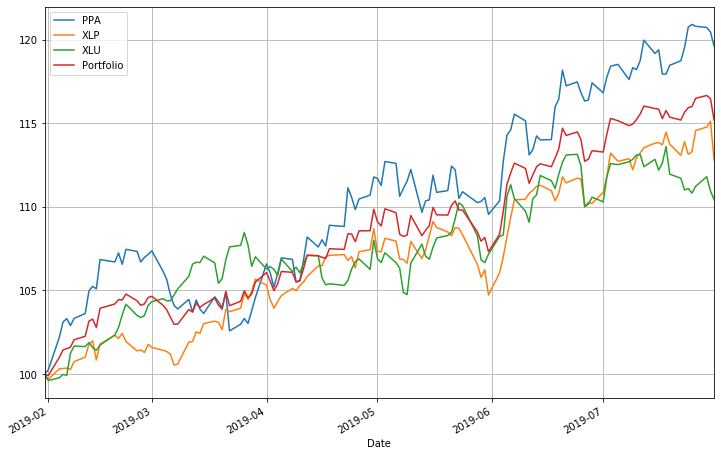

In [3]:
quote.setup_mask(stats.index)
sd = quote.optimize_portfolio()
quote.setup_mask(['PPA', 'XLP', 'XLU'])
sd.update(quote.optimize_portfolio())
quote.setup_mask({e for r in sd.values() for e in r})
sd.update(quote.optimize_portfolio())
for e in sd:
    print(e, sd[e])
_, ratio = sd.peekitem()
quote.setup_mask(ratio)
quote.graph(ratio)

In [ ]:
quote.setup_mask(['PPA', 'XLP', 'XLU'])
quote.graph({'PPA': 0.43, 'XLP': 0.36, 'XLU': 0.21})